In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as math
import datetime as dt

# import seaborn as sns
import pandas as pd
import geopandas as gpd
from sodapy import Socrata
import plotly.figure_factory as ff

%load_ext lab_black

In [2]:
df_2019 = pd.read_csv("../data/2019data.csv", low_memory=False)
df_2019.head()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,ac83e53e-df8a-47e1-9226-e387feba623c,577a99bb-de79-4a1d-b329-9d0598a00f43,scooter,168,0.0,2019-02-21T16:00:00.000,2019-02-21T16:00:00.000,2,16,4,2019,48453000601,48453000604
1,d836640a-585e-44f5-80f3-759da68942ef,d15d13b7-bb25-492b-ade8-a1b4af94c1bb,scooter,300,630.0,2019-02-21T16:00:00.000,2019-02-21T16:15:00.000,2,16,4,2019,48453000604,48453000601
2,acaf15db-d5ac-479b-acb9-f6fe06d16ed6,43936585-5c04-4e1a-90f2-e90a0cec8b11,scooter,338,1005.0,2019-02-07T05:45:00.000,2019-02-07T05:45:00.000,2,5,4,2019,48453001100,48453001100
3,5aa5d087-c7e1-4366-beae-8ae1b94b36f3,035699d8-1026-4ec0-98af-f9862d6a6680,scooter,167,458.0,2019-02-07T05:45:00.000,2019-02-07T06:00:00.000,2,5,4,2019,48453001305,48453001100
4,af7c6124-af5d-4457-8562-127ceee72fa4,1217c320-6fe3-4d1f-a43c-2318892c7dd4,scooter,141,122.0,2019-02-07T06:00:00.000,2019-02-07T06:00:00.000,2,6,4,2019,48453000601,48453000601


In [3]:
df_2020 = pd.read_csv("../data/2020data.csv", low_memory=False)
df_2020.head()

,trip_id,device_id,vehicle_type,trip_duration,trip_distance,start_time,end_time,month,hour,day_of_week,year,census_geoid_start,census_geoid_end
0,f33ffbe9-7462-4310-8d79-382842d4f374,61a22e55-d5b3-4fde-8d9a-ccaed12ce35c,scooter,2133,12794.0,2020-04-18T05:15:00.000,2020-04-18T05:45:00.000,4,5,5,2020,48453001100,48453001806
1,ddf0fa7c-41e2-43c4-b7ea-e4b7a323be78,f07ddca9-59b3-4ac0-a02b-459a42f8b58b,scooter,197,917.0,2020-04-18T05:30:00.000,2020-04-18T05:45:00.000,4,5,5,2020,48453000902,48453000902
2,2d895f0c-9586-4458-9e58-99cac4bc0191,8ced24e4-7396-4bd4-884a-fc7733ecfae3,scooter,721,3621.0,2020-04-18T05:15:00.000,2020-04-18T05:30:00.000,4,5,5,2020,48453000304,48453002105
3,b180f674-0e1d-4d78-9838-2b20a45bf9d2,1ed7b1f7-a174-422e-a4a2-d688e59732a9,scooter,214,788.0,2020-04-18T05:15:00.000,2020-04-18T05:15:00.000,4,5,5,2020,48453001901,48453001901
4,aa2bc2f8-fd08-4e58-85c4-90c44be2fe4d,4da13a13-db11-4610-a844-97a19d82fefa,scooter,622,3009.0,2020-04-18T05:00:00.000,2020-04-18T05:15:00.000,4,5,5,2020,48453000601,48453000304


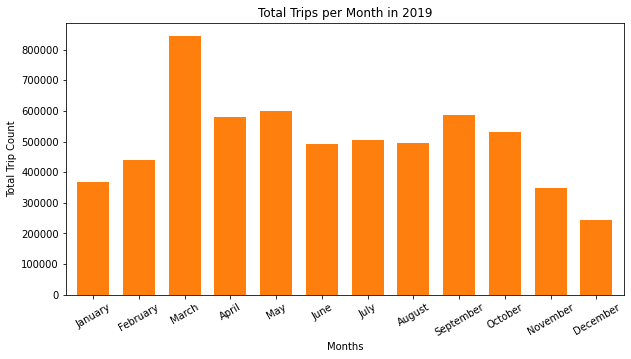

In [4]:
monthly_total = pd.DataFrame(df_2019["month"].value_counts()).sort_index()
import calendar

mn = [calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(
    title="Total Trips per Month in 2019",
    width=0.7,
    figsize=(10, 5),
    rot=30,
    legend=False,
    color="tab:orange",
)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.show()

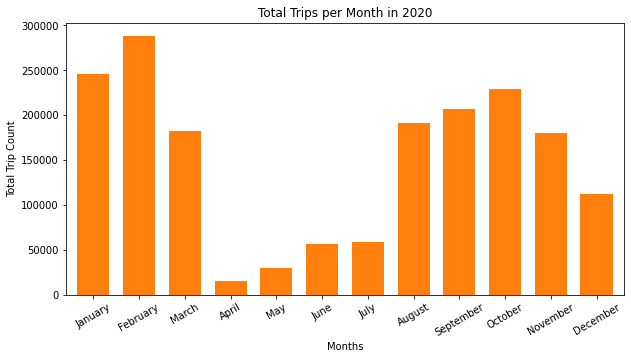

In [5]:
monthly_total = pd.DataFrame(df_2020["month"].value_counts()).sort_index()
import calendar

mn = [calendar.month_name[int(x)] for x in monthly_total.index.values.tolist()]

monthly_chart = monthly_total.plot.bar(
    title="Total Trips per Month in 2020",
    width=0.7,
    figsize=(10, 5),
    rot=30,
    legend=False,
    color="tab:orange",
)
monthly_chart.set_xticklabels(mn)
monthly_chart.set_xlabel("Months")
monthly_chart.set_ylabel("Total Trip Count")
plt.show()

In [64]:
vehicle_type_2020 = df_2020.groupby(["vehicle_type"])[["trip_id"]].count()
vehicle_type_2019 = df_2019.groupby(["vehicle_type"])[["trip_id"]].count()

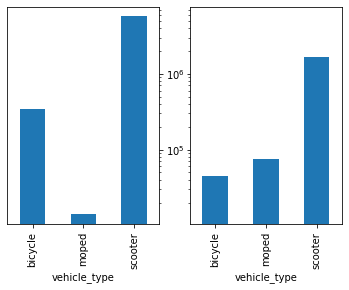

In [67]:
fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

ax.invert_xaxis()
ax.yaxis.tick_right()

vehicle_type_2019["trip_id"].plot(kind="bar", ax=ax)
vehicle_type_2020["trip_id"].plot(kind="bar", ax=ax2)
ax.set_yscale("log")
ax2.set_yscale("log")
plt.show()

In [131]:
# Plot the census tracts from the US Census Bureau's shapefile using geopandas.
from shapely.geometry import Point, LineString

map_df = gpd.read_file("../data/tl_2019_48_tract/tl_2019_48_tract.shp")
map_df["INTPTLAT"] = map_df["INTPTLAT"].str.replace("+", "")
map_df.head(1)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,439,121609,48439121609,1216.09,Census Tract 1216.09,G5020,S,4036421,2474977,32.6893777,-097.2140987,"POLYGON ((-97.23369 32.67175, -97.23366 32.671..."


In [125]:
# Read Austin Streetlines shapefile:
streets = gpd.read_file(
    "../data/Street Centerline/geo_export_c8b73b25-2ed4-4cce-b27a-5b77fe19ba06.shp"
)
streets = streets.to_crs(map_df.crs)

In [126]:
# Count how many trips started in each census GEOID tract
census_trip_start = pd.DataFrame(
    df_2020["census_geoid_start"].value_counts()
).reset_index()

# Count how many trips ended in each census GEOID tract
census_trip_end = pd.DataFrame(df_2020["census_geoid_end"].value_counts())

In [127]:
census_trip_start = census_trip_start.rename(
    columns={"index": "CTIDFP00", "census_geoid_start": "total_count"}
)

In [128]:
census_trip_start.dtypes

CTIDFP00       object
total_count     int64
dtype: object

In [129]:
census_trip_start = census_trip_start.drop(census_trip_start.index[58])

In [133]:
# Match the datatypes
map_df["GEOID"] = map_df["GEOID"].astype("int64")
map_df[["INTPTLAT", "INTPTLON"]] = map_df[["INTPTLAT", "INTPTLON"]].astype("float64")
census_trip_start["CTIDFP00"] = census_trip_start["CTIDFP00"].astype(int)

In [134]:
census_trip_start.dtypes

CTIDFP00       int64
total_count    int64
dtype: object

In [136]:
# Merge the geodataframe with the census starts dataframe
# starts_plot = pd.merge(map_df, census_trip_start, how="inner")
starts_plot = map_df.set_index("GEOID").join(census_trip_start, how="inner")
starts_plot

,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,CTIDFP00,total_count


<ipython-input-123-3b5dff418528>:22: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(


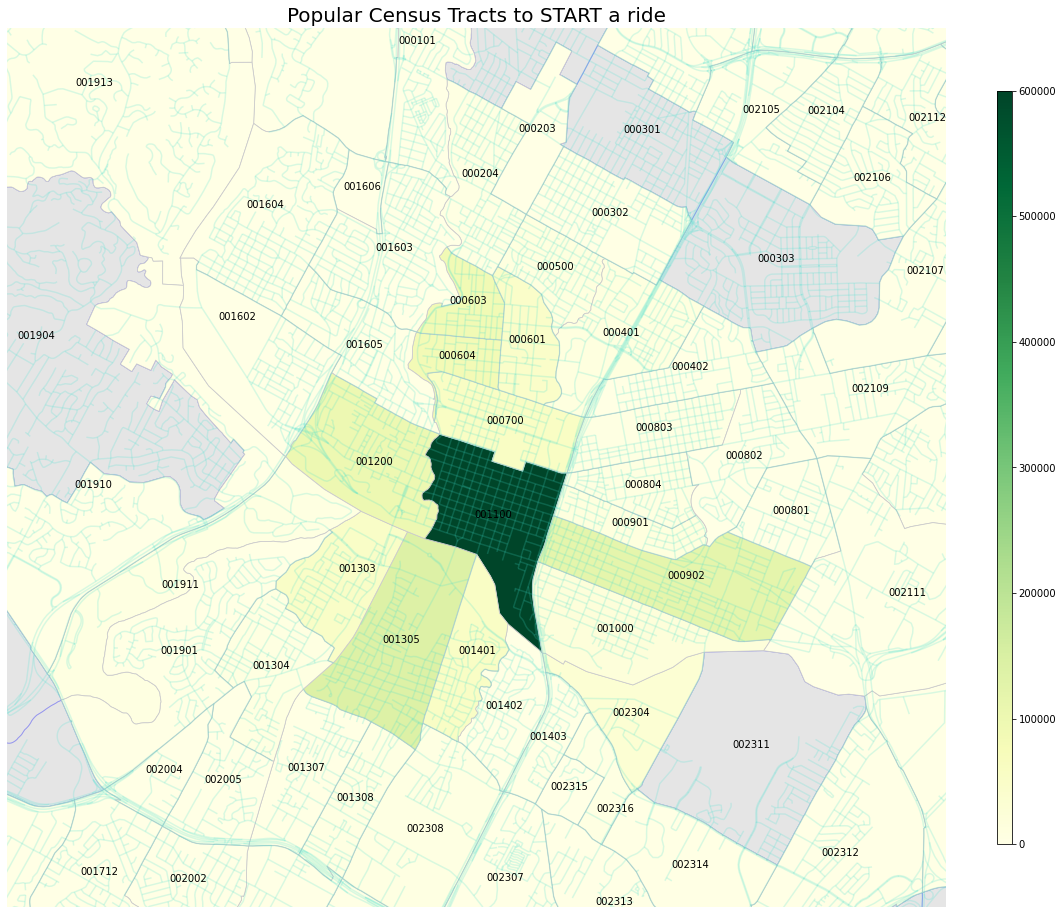

In [123]:
# Create a plot using geopandas and choropleth of census tract starts
_, ax = plt.subplots(figsize=(18, 18))


vmax_start = 600000
vmin_start = 0
# Render the glyphs:
map_df.plot(ax=ax, color="grey", edgecolor="blue", alpha=0.2)
starts_plot.plot(
    ax=ax,
    column="total_count",
    cmap="YlGn",
    linewidth=0.8,
    edgecolor="0.8",
    vmax=vmax_start,
    vmin=vmin_start,
)
streets.plot(ax=ax, color="turquoise", alpha=0.2)

# Label census tracts
for idx, row in map_df.iterrows():
    plt.annotate(
        s=row["TRACTCE00"],
        xy=(row["INTPTLON00"], row["INTPTLAT00"]),
        horizontalalignment="center",
        clip_on=True,
    )

# Set the limits of the plot
# To get a zommed out view use: (-97.919881, -97.589348, 30.139918,30.426626)
# For zoomed map use : (-97.81, -97.68, 30.22, 30.325)
bbox = (-97.81, -97.68, 30.22, 30.325)
plt.xlim(bbox[0], bbox[1])
plt.ylim(bbox[2], bbox[3])


plt.axis("off")
plt.title("Popular Census Tracts to START a ride", fontsize=20)
sm_start = plt.cm.ScalarMappable(
    cmap="YlGn", norm=plt.Normalize(vmin=vmin_start, vmax=vmax_start)
)

plt.colorbar(sm_start, fraction=0.015, aspect=50)
# plt.savefig("Plots/choropeth_tractstart.png")
plt.show()

In [22]:
starts_plot

,STATEFP00,COUNTYFP00,TRACTCE00,NAME00,NAMELSAD00,MTFCC00,FUNCSTAT00,ALAND00,AWATER00,INTPTLAT00,INTPTLON00,geometry,census_geoid_start,total_count
CTIDFP00,,,,,,,,,,,,,,
48453001766,48,453,001766,17.66,Census Tract 17.66,G5020,S,279772166,7922100,30.548660,-97.993538,"POLYGON ((-97.95351 30.47734, -97.95502 30.476...",NaN,NaN
48453002413,48,453,002413,24.13,Census Tract 24.13,G5020,S,1345937,0,30.197109,-97.740277,"POLYGON ((-97.74223 30.20387, -97.74159 30.204...",NaN,NaN
48453002412,48,453,002412,24.12,Census Tract 24.12,G5020,S,1389365,0,30.189406,-97.751490,"POLYGON ((-97.75452 30.18663, -97.75470 30.186...",NaN,NaN
48453002411,48,453,002411,24.11,Census Tract 24.11,G5020,S,3964067,0,30.205288,-97.748878,"POLYGON ((-97.74159 30.20493, -97.74223 30.203...",NaN,NaN
48453002410,48,453,002410,24.10,Census Tract 24.10,G5020,S,1212315,0,30.205764,-97.786666,"POLYGON ((-97.78695 30.21097, -97.78689 30.211...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48453001839,48,453,001839,18.39,Census Tract 18.39,G5020,S,8255627,0,30.404715,-97.658801,"POLYGON ((-97.65199 30.41296, -97.65183 30.412...",NaN,NaN
48453001836,48,453,001836,18.36,Census Tract 18.36,G5020,S,33655169,29022,30.468720,-97.626867,"POLYGON ((-97.62948 30.44392, -97.62968 30.444...",NaN,NaN
48453001401,48,453,001401,14.01,Census Tract 14.01,G5020,S,1256586,91300,30.250246,-97.744982,"POLYGON ((-97.74281 30.25901, -97.74250 30.258...",NaN,NaN
